In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

import numpy as np
%matplotlib inline

In [3]:
# calculates  the colour background for an x and y coordinate on the graph

def getColour(x,y):
    innerColor = (0, 0, 0) #the colour of the center
    outerColor = (255, 255, 255)
    xdist = (x - imgsize[0]//2) #floor division
    ydist = (y - imgsize[1]//2)
    distanceToCenter = np.sqrt(xdist ** 2 + ydist ** 2) # pythagoras
    radians = math.atan2(xdist, ydist)
    if radians < 0:
        radians += 2*np.pi
  
    angle = math.degrees(radians)
    angle = int(angle)
  
    distanceToCenter = distanceToCenter / (np.sqrt(2) * imgsize[0]/2)
    red = cmap(angle)[0] * 256
    green = cmap(angle)[1] *256
    blue = cmap(angle)[2]*256

    #Calculate r, g, and b values
    r = red * distanceToCenter + innerColor[0] * (1 - distanceToCenter)
    g = green * distanceToCenter + innerColor[1] * (1 - distanceToCenter)
    b = blue * distanceToCenter + innerColor[2] * (1 - distanceToCenter)
    col = (int(r), int(g), int(b))
    return col

In [4]:
#generates the back groound image
from matplotlib import cm
arr = np.zeros((256,256,3), dtype=np.uint8)
imgsize = arr.shape[:2]


cmap=cm.get_cmap('hsv',360)
for x in range(imgsize[1]):
    for y in range(imgsize[0]):
        #Find the distance to the center
        
        arr[x, y] = getColour(x,y)
arr=np.rot90(arr) # rotate 90 degrees to allign graph coordinates with image coordinated


In [12]:
x = 0.5
y = 0
xD= []
yD=[]
for i in range(0,1000):
    y = 3.76995 * x *(1-x)
    xD.append(x)
    yD.append(y)
    #print x,y
    x = y

In [13]:
#generate data to draw a circle
r=5
t= np.arange(0,5*2*np.pi, 0.2)
#x=r*np.sin(t);
#y=r*np.cos(t);


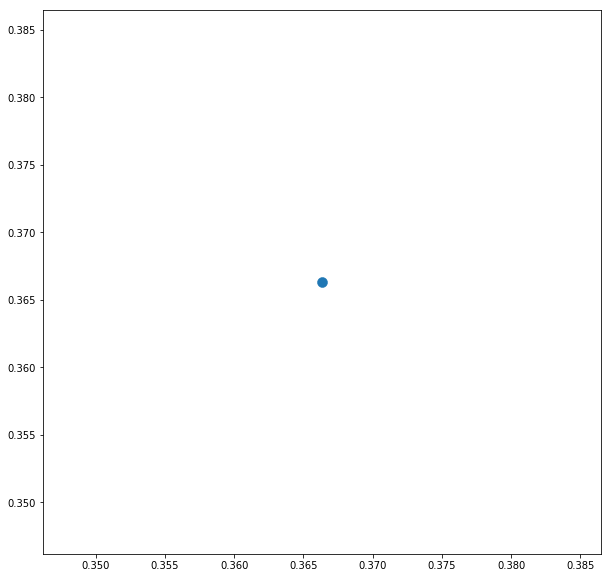

In [14]:
fig, ax = plt.subplots()
fig.set_size_inches(10,10)

plt.plot(x,y,".-",markersize=20,markeredgewidth=0.5)

Text(0.5,1,'wierd little graph')

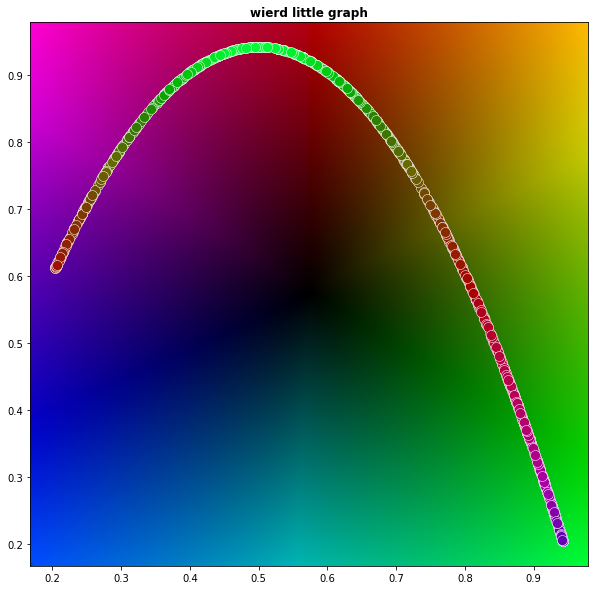

In [15]:

x = np.array(xD)
y = np.array(yD)

# rescale to data to size of background
xi = np.interp(x,(x.min(),x.max()),(0,256)) 
yi = np.interp(y,(y.min(),y.max()),(0,256))


#claculate colour of data point
coli = []
for i in range(0,len(xi)):
    col = getColour(xi[i],yi[i])
    col = [float(z)/256 for z in col]
    coli.append(col)
coli.append([0.0,0.0,0.0])   # add a black colour as the last colour incase you over step array

fig, ax = plt.subplots()
fig.set_size_inches(10,10)

#step through datapoints setting their colour from the colour array using the correct offsett
for i in range(0,len(x)-1): # reduce the range by 1 to prevent stepping past the end of the array is (i+1)
    plt.plot(x[i],y[i],".",color = coli[i +1], markersize=20,markeredgecolor=(1, 1, 1, 1),markeredgewidth=0.5)
scale_factor = 5

xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()


plotlim = plt.xlim() + plt.ylim() 


ax.imshow(arr, cmap=plt.cm.Greens, interpolation='bicubic', extent=plotlim,aspect = 'auto')  
plt.draw()  
plt.title('wierd little graph', fontweight ="bold")
